<a href="https://colab.research.google.com/github/viethoang298/AI-MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

test.py


In [ ]:
from sklearn import tree

X = [[0,0], [2,2]]
y = [0.5, 2.5]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])

array([0.5])

example_dt_iris.py


Plot the decision surface of a decision tree on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py



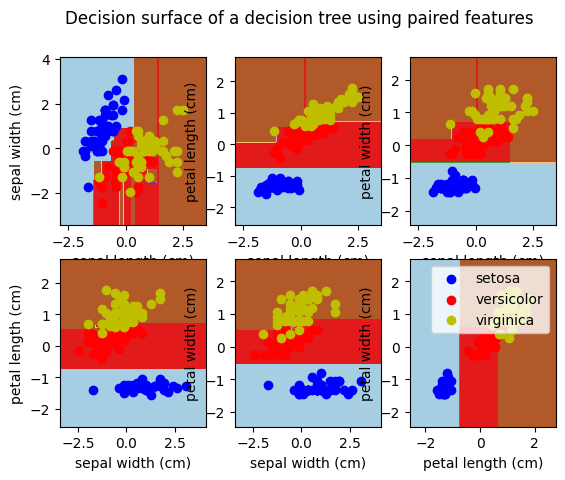

In [ ]:
"""
================================================================
Plot the decision surface of a decision tree on the iris dataset
================================================================

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    # <array>.shape returns the dimensions of the array
    # arange (start,stop,step) creates a 1-D vector
    idx = np.arange(X.shape[0])  # returns an array from 0 to X.shape[0], or 150
    np.random.seed(13)  # Seed the randomization
    np.random.shuffle(idx)  # Shuffle in place based on the seeded randomization

    X = X[idx]   # re-sort X randomly based on IDX as indices
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)    # Take the mean over the first axis (long axis)
    std = X.std(axis=0)
    X = (X - mean) / std   # Normalize to a 'normal distribution'

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Meshgrid creates coordinate grid from vectors of coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Ravel creates a 1-D view of the vector
    # c_ concatenates 1D vectors into columns of a 2D array, basically
    #    making xx.ravel() column 0, yy.ravel() column 1
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

dtree_eval.py

Comparing Decision Trees

In [ ]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Chris Clingerman
'''

import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score



def evaluatePerformance():
    '''
    Evaluate the performance of decision trees,
    averaged over 1,000 trials of 10-fold cross validation

    Return:
      a matrix giving the performance that will contain the following entries:
      stats[0,0] = mean accuracy of decision tree
      stats[0,1] = std deviation of decision tree accuracy
      stats[1,0] = mean accuracy of decision stump
      stats[1,1] = std deviation of decision stump
      stats[2,0] = mean accuracy of 3-level decision tree
      stats[2,1] = std deviation of 3-level decision tree

    ** Note that your implementation must follow this API**
    '''

    # Load Data
    filename = 'https://raw.githubusercontent.com/adziorny/CIS419/master/Assignment1/hw1_skeleton/data/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]  #data input from all rows and second colloums
    y = np.array([data[:, 0]]).T
    n,d = X.shape

    # shuffle the data
    num_trials = 100
    num_folds = 10
    fold_accuracy = np.zeros((num_trials*num_folds,3))
    depths = [None, 1, 3]
    for i in range(num_trials):
      idx = np.arange(n)
      np.random.seed(13)
      np.random.shuffle(idx)
      X = X[idx]
      y = y[idx]
      for j in range(num_folds):
        # split the data
            test_indices = idx[j * (n // num_folds): (j + 1) * (n // num_folds)]
            train_indices = np.concatenate([idx[:j * (n // num_folds)], idx[(j + 1) * (n // num_folds):]])

            Xtrain, Xtest = X[train_indices], X[test_indices]
            ytrain, ytest = y[train_indices], y[test_indices]

            for depth_idx, depth in enumerate(depths):
                clf = tree.DecisionTreeClassifier(max_depth=depth)
                clf.fit(Xtrain, ytrain)
                y_pred = clf.predict(Xtest)
                # compute the training accuracy of the model
                meanDecisionTreeAccuracy = accuracy_score(ytest, y_pred)
                fold_accuracy[(i*num_folds+j, depth_idx)] = meanDecisionTreeAccuracy


    # calculate mean and standard deviation
    meanDecisionTreeAccuracy = np.mean(fold_accuracy, axis=0)
    stddevDecisionTreeAccuracy = np.std(fold_accuracy, axis=0)

    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy[0]
    stats[0,1] = stddevDecisionTreeAccuracy[0]
    stats[1,0] = meanDecisionTreeAccuracy[1]
    stats[1,1] = stddevDecisionTreeAccuracy[1]
    stats[2,0] = meanDecisionTreeAccuracy[2]
    stats[2,1] = stddevDecisionTreeAccuracy[2]
    return stats



# Do not modify from HERE...
if __name__ == "__main__":

    stats = evaluatePerformance()
    print ("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print ("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print ("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")
# ...to HERE.

Decision Tree Accuracy =  0.7379999999999994  ( 0.08708507708492687 )
Decision Stump Accuracy =  0.7936538461538399  ( 0.07455762038448165 )
3-level Decision Tree =  0.7583461538461524  ( 0.07946670435214802 )


Draw learning curve

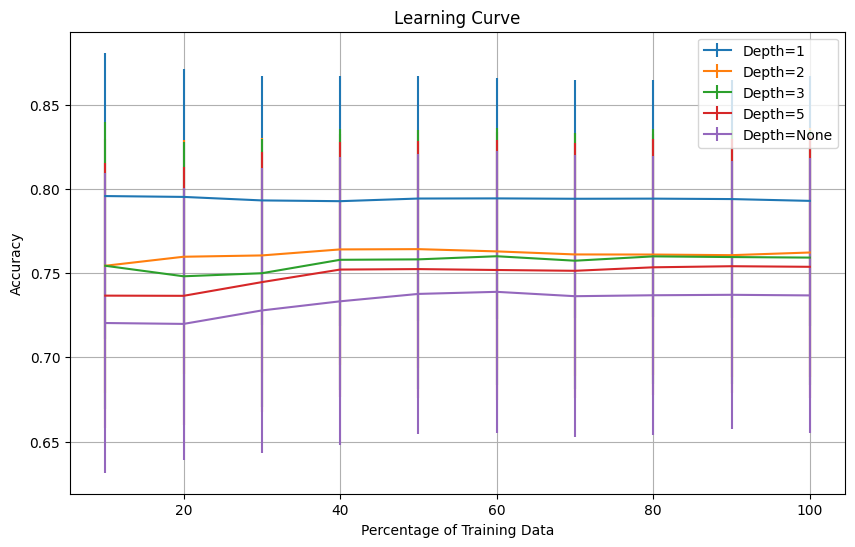

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluatePerformance():
    # Load Data
    filename = 'https://raw.githubusercontent.com/adziorny/CIS419/master/Assignment1/hw1_skeleton/data/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = data[:, 0]
    n, d = X.shape

    np.random.seed(13)  # Seed for reproducibility

    num_trials = 100
    num_folds = 10
    accuracies = np.zeros((num_trials * num_folds, 5))  # To store accuracy values for each fold and model

    idx = np.arange(n)

    # Varying depths for decision trees
    depths = [1, 2, 3, 5, None]

    for i in range(num_trials):
        np.random.shuffle(idx)  # Shuffle data indices for each trial

        for j in range(num_folds):
            test_indices = idx[j * (n // num_folds): (j + 1) * (n // num_folds)]
            train_indices = np.concatenate([idx[:j * (n // num_folds)], idx[(j + 1) * (n // num_folds):]])

            Xtrain, Xtest = X[train_indices], X[test_indices]
            ytrain, ytest = y[train_indices], y[test_indices]

            for depth_idx, depth in enumerate(depths):
                clf = DecisionTreeClassifier(max_depth=depth)
                clf.fit(Xtrain, ytrain)
                y_pred = clf.predict(Xtest)
                accuracies[i * num_folds + j, depth_idx] = accuracy_score(ytest, y_pred)

    # Calculate mean and standard deviation for each depth
    mean_accuracies = np.mean(accuracies, axis=0)
    std_accuracies = np.std(accuracies, axis=0)

    # Calculate mean accuracy and standard deviation for each training subset
    subset_sizes = np.arange(0.1, 1.1, 0.1)
    mean_subset_accuracies = np.zeros((len(subset_sizes), len(depths)))
    std_subset_accuracies = np.zeros((len(subset_sizes), len(depths)))

    for i, subset_size in enumerate(subset_sizes):
        for depth_idx, depth in enumerate(depths):
            subset_end = int(subset_size * n)
            subset_accuracies = accuracies[:, depth_idx][accuracies[:, depth_idx] != 0][:subset_end]
            mean_subset_accuracies[i, depth_idx] = np.mean(subset_accuracies)
            std_subset_accuracies[i, depth_idx] = np.std(subset_accuracies)

    # Plotting the learning curve
    plt.figure(figsize=(10, 6))

    for depth_idx, depth in enumerate(depths):
        plt.errorbar(subset_sizes * 100, mean_subset_accuracies[:, depth_idx],
                     yerr=std_subset_accuracies[:, depth_idx], label=f'Depth={depth}')

    plt.xlabel('Percentage of Training Data')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Test the function
evaluatePerformance()


test_linreg_multivariate.py

In [ ]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None


    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        for i in xrange(self.n_iter):
            self.JHist.append( (self.computeCost(X, y, theta), theta) )
            print ( "Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta: ", theta)
            # TODO:  add update equation here

        return theta


    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost
              ** make certain you don't return a matrix with just one value! **
        '''
        # TODO: add objective (cost) equation here


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n = len(y)
        n,d = X.shape
        if self.theta==None:
            self.theta = np.matrix(np.zeros((d,1)))
        self.theta = self.gradientDescent(X,y,self.theta)


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        # TODO:  add prediction function here

In [51]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None


    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        for i in range(self.n_iter):
            self.JHist.append( (self.computeCost(X, y, theta), theta) )
            print ("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta: ", theta)
            # TODO:  add update equation here

        return theta


    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost
              ** make certain you don't return a matrix with just one value! **
        '''
        # TODO: add objective (cost) equation here


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n = len(y)
        n,d = X.shape
        if (self.theta == None).all():
            self.theta = np.matrix(np.zeros((d,1)))
        self.theta = self.gradientDescent(X,y,self.theta)


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        # TODO:  add prediction function here
'''
    TEST SCRIPT FOR MULTIVARIATE LINEAR REGRESSION
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''

'''
Numpy is a standard library in python that lets you do matrix and vector operations like Matlab in python.
Check out documentation here: http://wiki.scipy.org/Tentative_NumPy_Tutorial
If you are a Matlab user this page is super useful: http://wiki.scipy.org/NumPy_for_Matlab_Users
'''
import numpy as np
from numpy.linalg import *

# our linear regression class


if __name__ == "__main__":
    '''
        Main function to test multivariate linear regression
    '''

    # load the data

    filePath = "https://raw.githubusercontent.com/adziorny/CIS419/master/Assignment1/hw1_skeleton/data/multivariateData.dat"

    allData = np.loadtxt(filePath, delimiter=',')

    X = np.matrix(allData[:,:-1])
    y = np.matrix((allData[:,-1])).T

    n,d = X.shape

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Add a row of ones for the bias term
    X = np.c_[np.ones((n,1)), X]

    # initialize the model
    init_theta = np.matrix(np.random.randn((d+1))).T
    n_iter = 2000
    alpha = 0.01

    # Instantiate objects
    lr_model = LinearRegression(init_theta = init_theta , alpha = alpha, n_iter = n_iter)
    lr_model.fit(X,y)

    # Compute the closed form solution in one line of code
    thetaClosedForm = (X.getT()*X).getI()*X.getT()*y   # TODO:  replace "0" with closed form solution
    print( "thetaClosedForm: ", thetaClosedForm)


Streaming output truncated to the last 5000 lines.
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  336  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  337  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  338  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  339  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  340  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  341  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  342  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  343  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  344  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  345  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053165]]
Iteration:  346  Cost:  None  Theta:  [[-2.11883342]
 [ 0.62809823]
 [ 0.25053

test_linreg_univariate.py

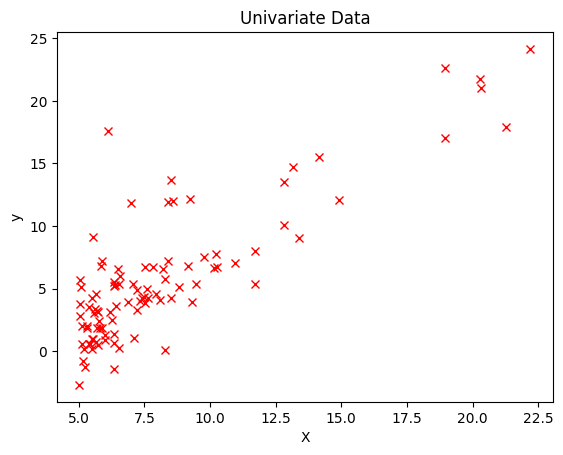

Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iteration: 
Iter

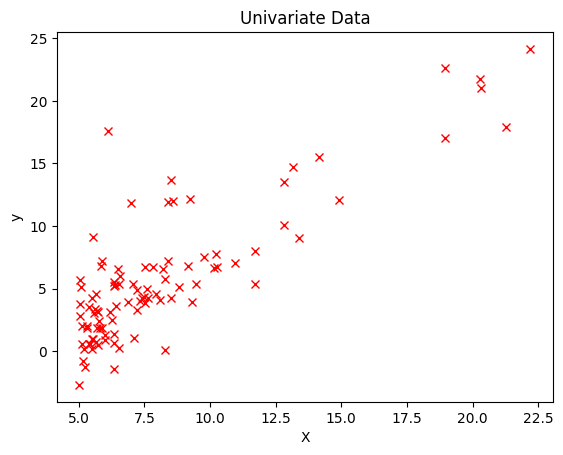

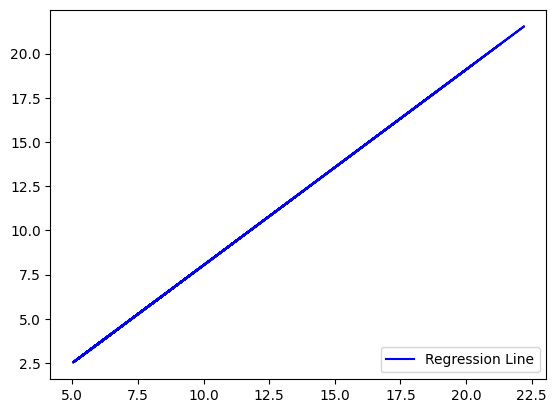

<ipython-input-50-c4bd14792ebd>:177: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


ValueError: ignored

AttributeError: ignored

<Figure size 640x480 with 2 Axes>

In [50]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None


    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        for i in range(self.n_iter):
            self.JHist.append( (self.computeCost(X, y, theta), theta) )
            print ("Iteration: "), i+1, " Cost: ", self.JHist[i][0], " Theta: ", theta
            # TODO:  add update equation here
            n,d = X.shape
            thetaDimensions,b = theta.shape
            corrections = [0] * thetaDimensions
            for j in range(0,n):
                for thetaDimension in range(0,thetaDimensions):
                    corrections[thetaDimension] += (theta.getT()*X[j,:].getT() - y[j])*X[j,thetaDimension]
            for thetaDimension in range(0,thetaDimensions):
                theta[thetaDimension] = theta[thetaDimension] - corrections[thetaDimension]*(self.alpha/n)
        return theta


    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost
              ** make certain you don't return a matrix with just one value! **
        '''
        # TODO: add objective (cost) equation here
        n,d = X.shape
        cost = (X*theta - y).getT()*(X*theta - y)/(2*n)
        return cost[0,0]


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n = len(y)
        n,d = X.shape
        if (self.theta==None).all():
            self.theta = np.matrix(np.zeros((d,1)))
        self.theta = self.gradientDescent(X,y,self.theta)


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        # TODO:  add prediction function here
        return X*self.theta

'''
    TEST SCRIPT FOR UNIVARIATE LINEAR REGRESSION
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''

'''
Numpy is a standard library in python that lets you do matrix and vector operations like Matlab in python.
Check out documentation here: http://wiki.scipy.org/Tentative_NumPy_Tutorial
If you are a Matlab user this page is super useful: http://wiki.scipy.org/NumPy_for_Matlab_Users
'''
import numpy as np
from numpy.linalg import *

# Matplotlib provides matlab like plotting tools in python
import matplotlib.pyplot as plt



# All the modules needed for 3d surface plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#------------------------------------------------------------------------------------------------
# Plotting tools already written for you.
# Feel free edit and experiment.

def plotData1D( X, y, to_block = True):
    '''
        This function is to plot y vs X where the number of predictors of X is 1.
        Input
        X - n*1 matrix or vector of length n
        y - n*1 matrix or vector of length n
        to_block - boolean flag which when set stops the program execution until the
            plot is closed
    '''
    plt.figure(1)
    plt.clf()
    plt.title("Univariate Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(X,y, 'rx', label='Training Data')
    plt.show(block = to_block)

def plotRegLine1D( lr_model, X, y):
    '''
        Plots the y vs X and also the regressed line according to the theta computed.
        Input
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
        lr_model - linear regression trained model
    '''
    plotData1D(X[:,1], y, to_block =False)

    plt.plot(X[:,1],X*lr_model.theta,'b-', label='Regression Line')
    plt.legend(loc='lower right')

    plt.show()


def visualizeObjective(lr_model,t1_vals,t2_vals, X, y):
    '''
        The function does the surface plot of the objective for a
        univariate regression problem with a bias term, so over 2 parameters.
        Search over the space of theta1, theta2.

        It also plots the gradient descent steps as blue points on the surface plot.
        Finally it plots a contour plot of the same

        lr_model - object of class LinReg (already trained)
        t1_vals, t2_vals - values over which the objective function should be plotted
                        List of numbers
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
    '''
    T1,T2 = np.meshgrid(t1_vals, t2_vals)
    n,p = T1.shape

    # Compute the objective function over the space
    Z = np.zeros(T1.shape)
    for i in range(n):
        for j in range(p):
            Z[i,j] = lr_model.computeCost(X,y, np.matrix([T1[i,j],T2[i,j]]).T )

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(T1, T2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    #plt.hold(True)

    # If the history of the objective function plot the path taken by the gradient descent
    if lr_model.JHist !=None:

        for ii in range(len(lr_model.JHist)-1):
            t1 = lr_model.JHist[ii][1].tolist()
            t2 = lr_model.JHist[ii+1][1].tolist()

            J1 = lr_model.JHist[ii][0]
            J2 = lr_model.JHist[ii+1][0]

            x_pts = [t1[0][0], t2[0][0]]
            y_pts = [t1[1][0], t2[1][0]]
            J_pts = [J1, J2]
            plt.plot(x_pts, y_pts, J_pts, 'b-')

        for J, t in lr_model.JHist:
            plt.plot(t[0][0], t[1][0], J, 'mo')

    plt.title('Surface plot of the cost function')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    plt.show()

    # Contour plot
    plt.figure()
    plt.clf()
    CS = plt.contour(T1, T2, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Contours of cost function')
    plt.xlabel("Theta0")
    plt.ylabel("Theta1")

    plt.plot(lr_model.theta[0][0],lr_model.theta[1][0], 'rx')
    plt.show()

#------------------------------------------------------------------------------------------------
import numpy as np
from numpy.linalg import *
if __name__ == "__main__":
    '''
        Main function to test univariate linear regression
    '''

    # load the data
    filePath = "https://raw.githubusercontent.com/adziorny/CIS419/master/Assignment1/hw1_skeleton/data/univariateData.dat"

    allData = np.loadtxt(filePath, delimiter=',')

    X = np.matrix(allData[:,:-1])
    y = np.matrix((allData[:,-1])).T

    n,d = X.shape

    # Add a row of ones for the bias term
    X = np.c_[np.ones((n,1)), X]

    # initialize the model
    init_theta = np.matrix(np.ones((d+1,1)))*10  # note that we really should be initializing this to be near zero, but starting it near [10,10] works better to visualize gradient descent for this particular problem
    n_iter = 1500
    alpha = 0.01

    # Instantiate objects
    lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
    plotData1D(X[:,1],y)
    lr_model.fit(X,y)
    plotRegLine1D(lr_model,X, y)

    # Visualize the objective function convex shape
    theta1_vals = np.linspace(-10, 10, 100);
    theta2_vals = np.linspace(-10, 10, 100);
    visualizeObjective(lr_model,theta1_vals, theta2_vals, X, y)

    # Compute the closed form solution in one line of code
    theta_closed_form = (X.getT()*X).getI()*X.getT()*y  # TODO:  replace "0" with closed form solution
    print ("theta_closed_form: ", theta_closed_form)



    #TEST.plot
    #filePath =  "https://raw.githubusercontent.com/adziorny/CIS419/master/Assignment1/hw1_skeleton/data/univariateData.dat"
    #allData = np.loadtxt(file, delimiter=',')
    X_test = np.matrix(allData[:,:-1])
    y_test = np.matrix((allData[:,-1])).T
    # g e t t h e number o f i n s t a n c e s ( n ) and number o f f e a t u r e s ( d )
    n,d = X_test.shape
    X_test = np.c_[np.ones((n,1)), X_test]
    lr_model_test = LinearRegression(alpha = 0.01, n_iter = 5)
    lr_model_test.fit(X_test,y_test)
    plotRegLine1D(lr_model_test, X_test, y_test)

